In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('/content/T-20 World cup 2022.csv')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

1.DATA EXPLORATION

a)Team Performance

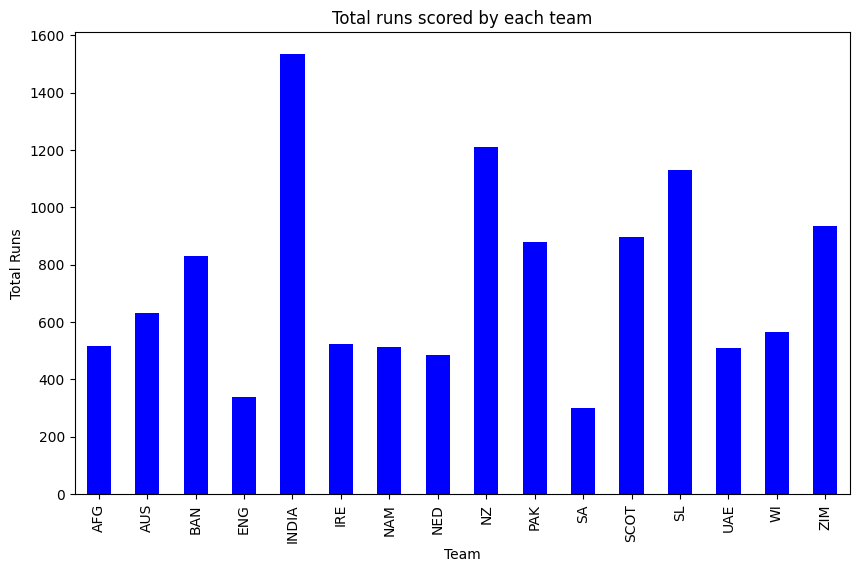

In [ ]:
#total runs scored by each team
tot_runs_by_team=data.groupby('home_team')['runs'].sum()
plt.figure(figsize=(10,6))
tot_runs_by_team.plot(kind='bar',color='blue')
plt.title('Total runs scored by each team')
plt.xlabel('Team')
plt.ylabel('Total Runs')
plt.show()

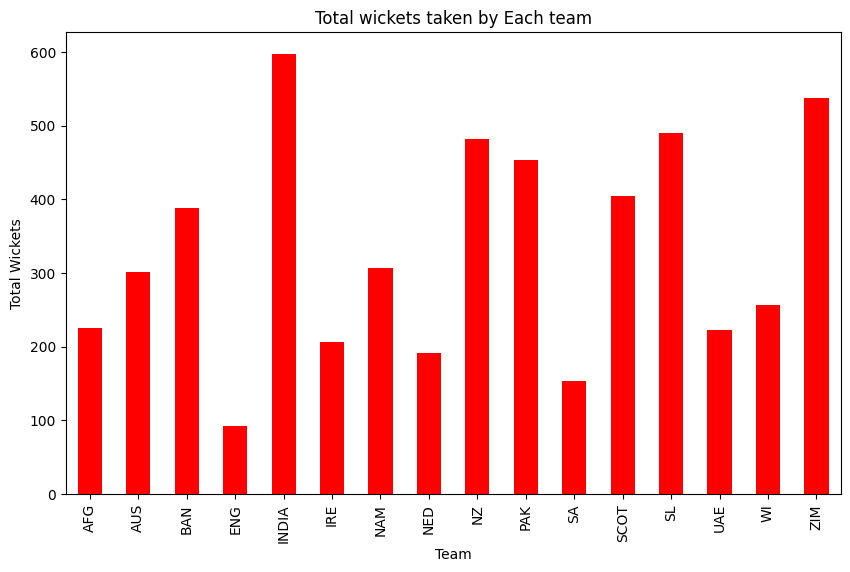

In [ ]:
#total wickets taken by each team
tot_wickets_taken=data.groupby('home_team')['bowler1_wkts'].sum()
plt.figure(figsize=(10,6))
tot_wickets_taken.plot(kind='bar',color='red')
plt.title('Total wickets taken by Each team')
plt.xlabel('Team')
plt.ylabel('Total Wickets')
plt.show()

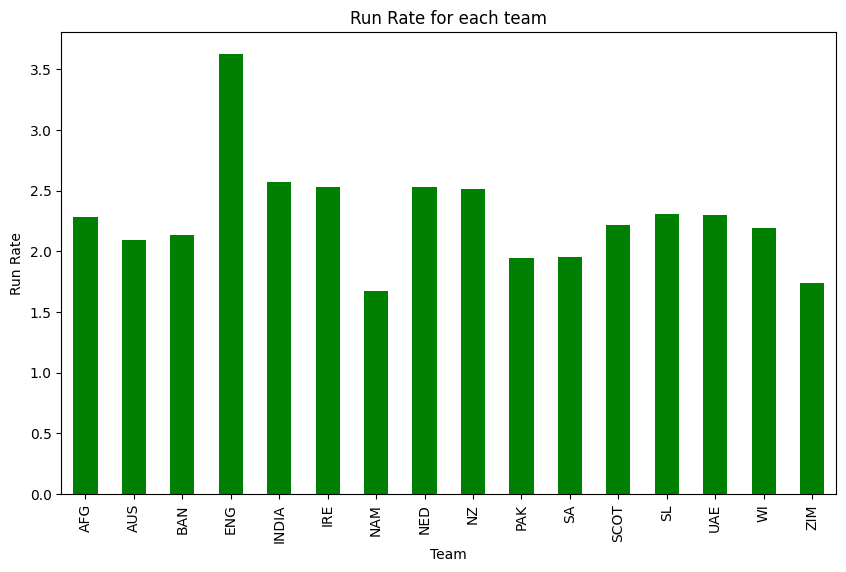

In [ ]:
#run rate analysis of each team
run_rate=tot_runs_by_team/tot_wickets_taken
plt.figure(figsize=(10,6))
run_rate.plot(kind='bar',color='green')
plt.title('Run Rate for each team')
plt.xlabel('Team')
plt.ylabel('Run Rate')
plt.show()

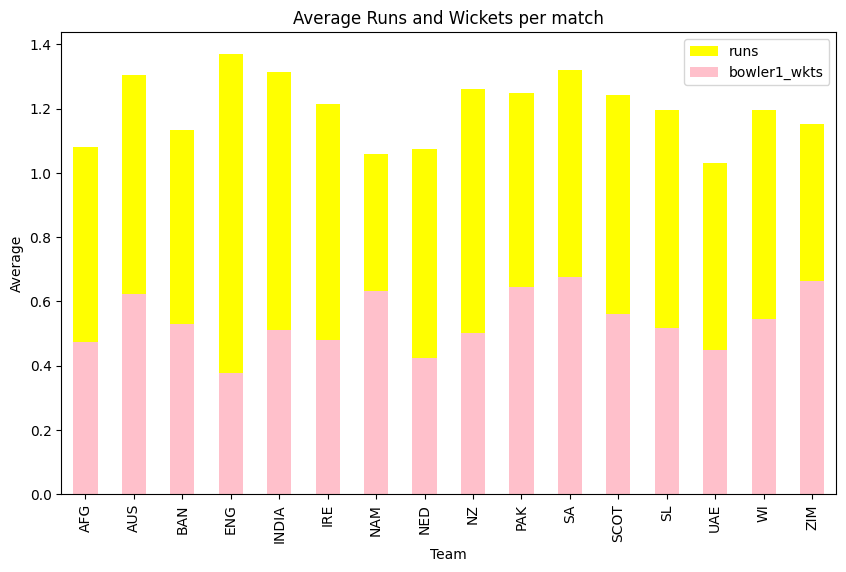

In [ ]:
#consistency of team performance
avg_runs=data.groupby('home_team')['runs'].mean()
avg_wickets=data.groupby('home_team')['bowler1_wkts'].mean()
plt.figure(figsize=(10,6))
avg_runs.plot(kind='bar',color='yellow')
avg_wickets.plot(kind='bar',color='pink')
plt.title('Average Runs and Wickets per match')
plt.xlabel('Team')
plt.ylabel('Average')
plt.legend()
plt.show()

b)Player Performances

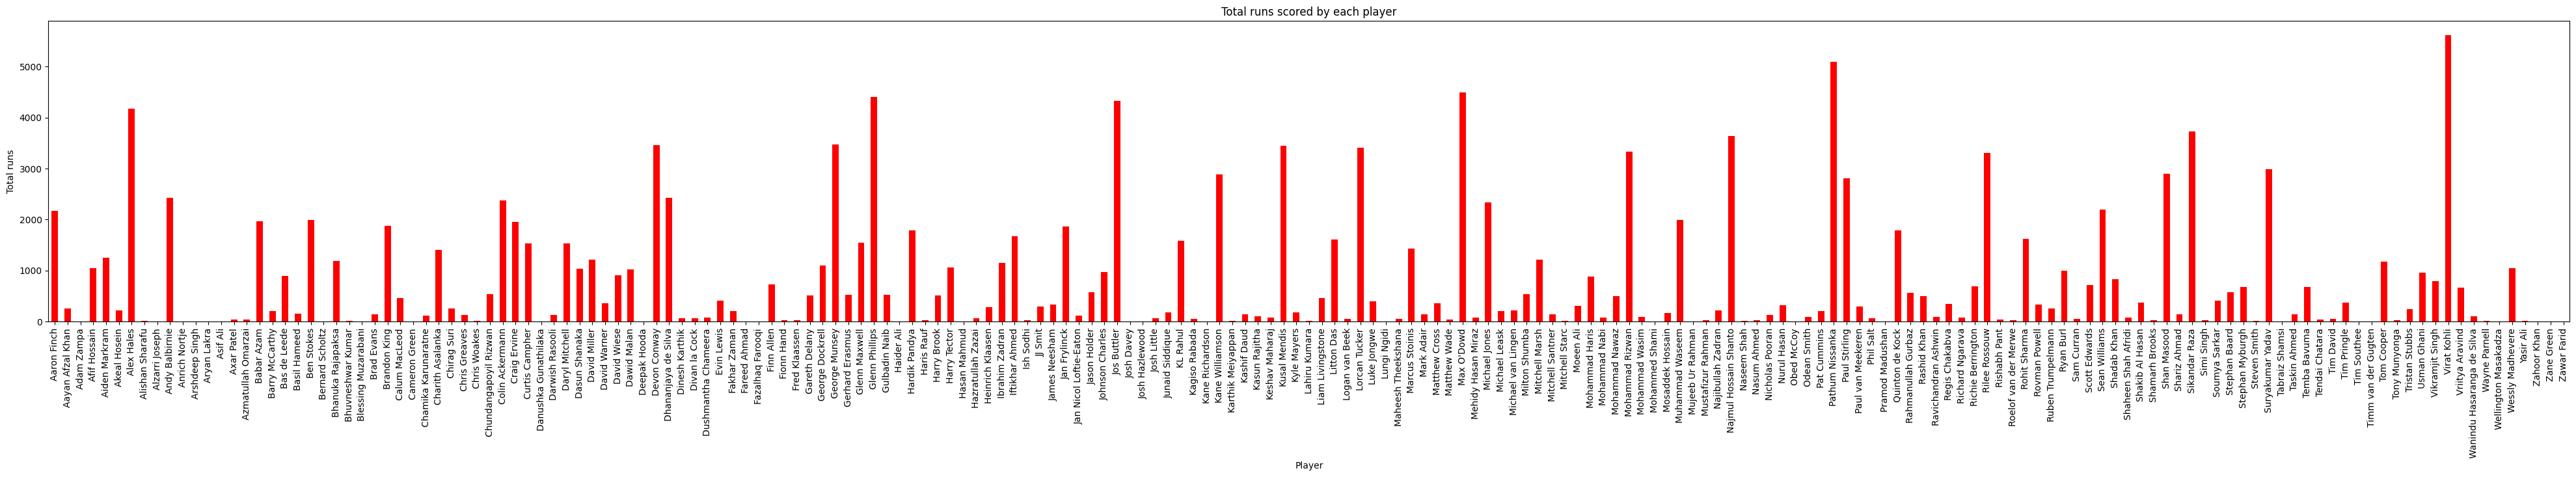

In [ ]:
#Batting performance
tot_runs_by_player=data.groupby('batsman1_name')['batsman1_runs'].sum()
plt.figure(figsize=(50,6))
tot_runs_by_player.plot(kind='bar',color='red')
plt.title('Total runs scored by each player')
plt.xlabel('Player')
plt.ylabel('Total runs')
plt.show()

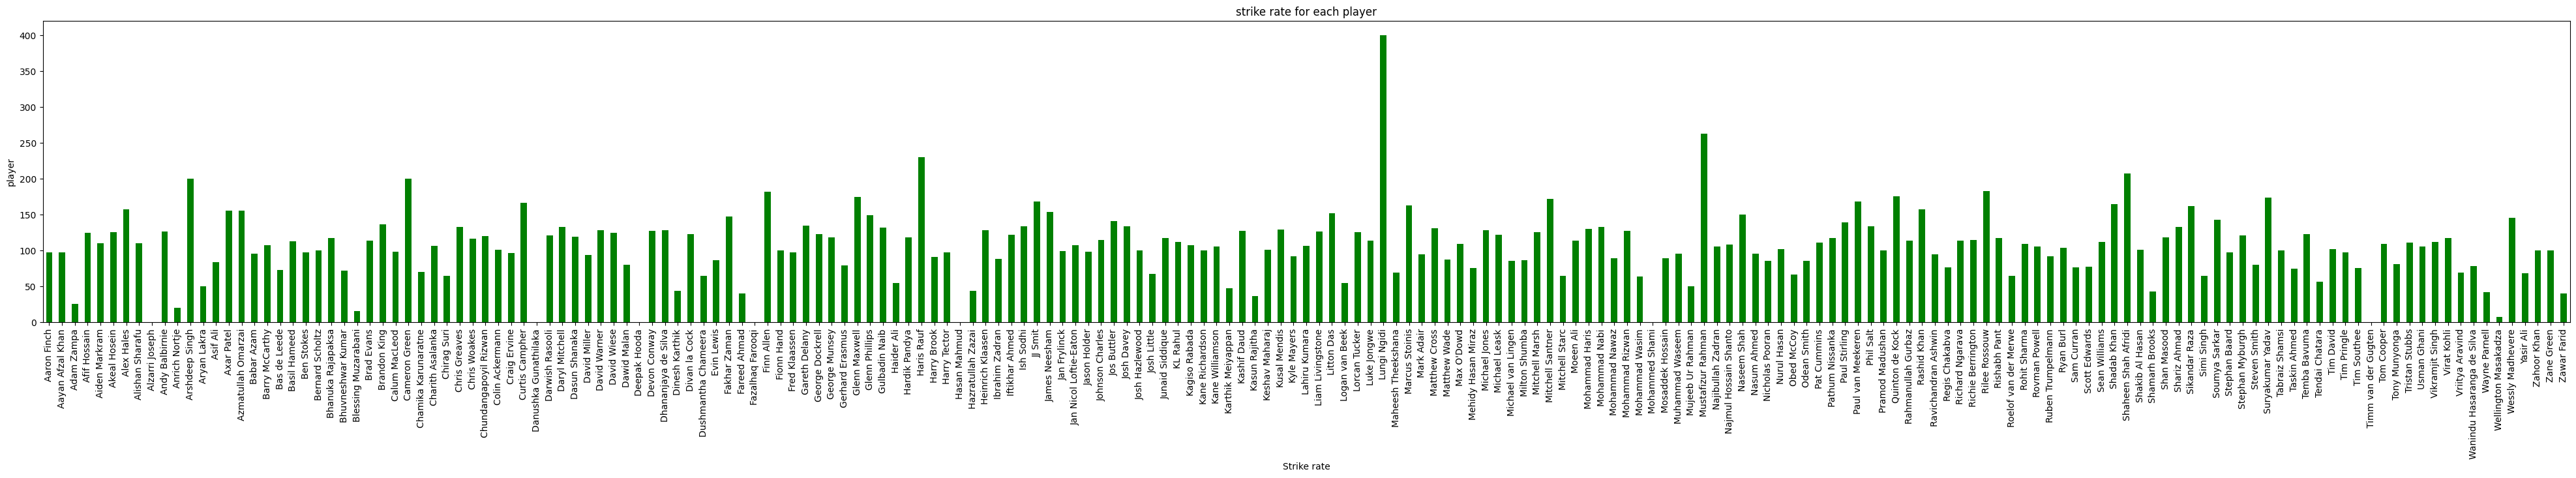

In [ ]:
#strike rate
strike_rate=(tot_runs_by_player/data.groupby('batsman1_name')['batsman1_balls'].sum())*100
plt.figure(figsize=(50,6))
strike_rate.plot(kind='bar',color='green')
plt.title("strike rate for each player")
plt.xlabel('Strike rate')
plt.ylabel('player')
plt.show()

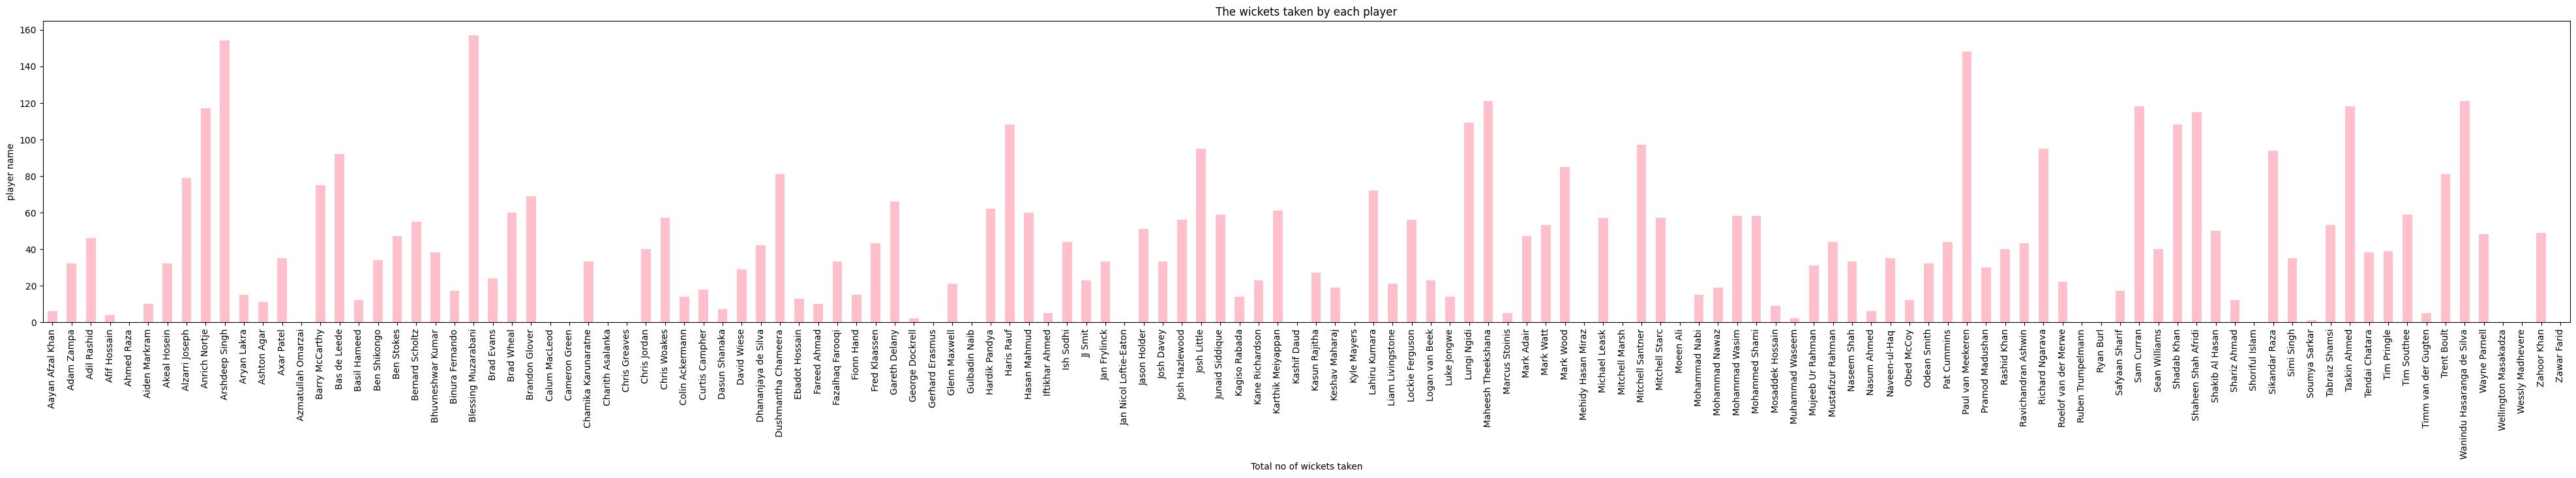

In [ ]:
#total wickets taken
tot_wickets=data.groupby('bowler1_name')['bowler1_wkts'].sum()
plt.figure(figsize=(50,6))
tot_wickets.plot(kind='bar',color='pink')
plt.title("The wickets taken by each player")
plt.xlabel("Total no of wickets taken")
plt.ylabel("player name")
plt.show()

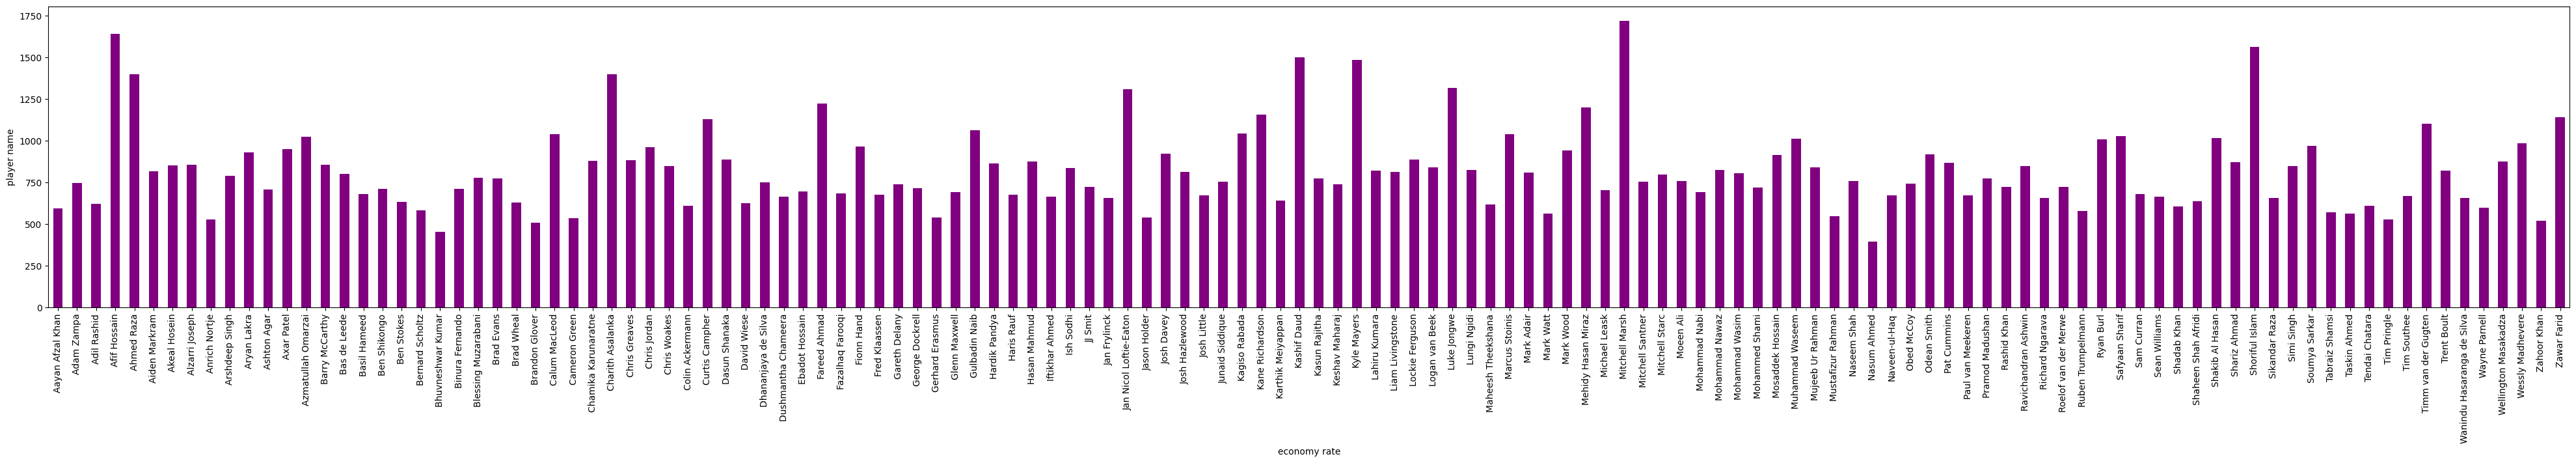

In [ ]:
#economy rate
eco_rate=(data.groupby('bowler1_name')['bowler1_runs'].sum()/data.groupby('bowler1_name')['bowler1_overs'].sum())*100
plt.figure(figsize=(50,6))
eco_rate.plot(kind='bar',color='purple')
plt.xlabel('economy rate')
plt.ylabel("player name")
plt.show()

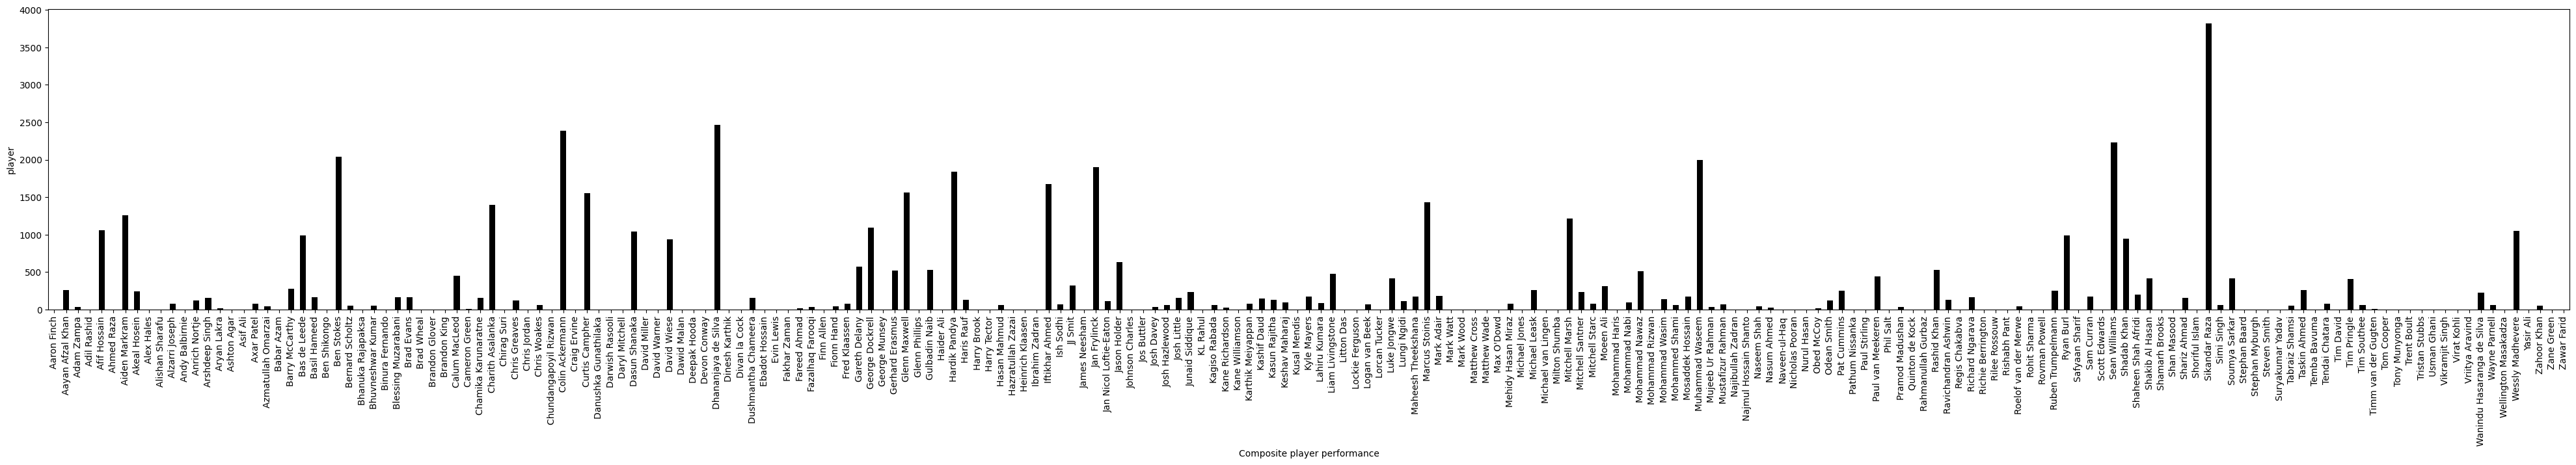

In [ ]:
#Overall performance of the best players
comp_score=tot_runs_by_player+tot_wickets
plt.figure(figsize=(50,6))
comp_score.plot(kind='bar',color='black')
plt.xlabel('Composite player performance')
plt.ylabel('player')
plt.show()

Identifying the Key events of the match

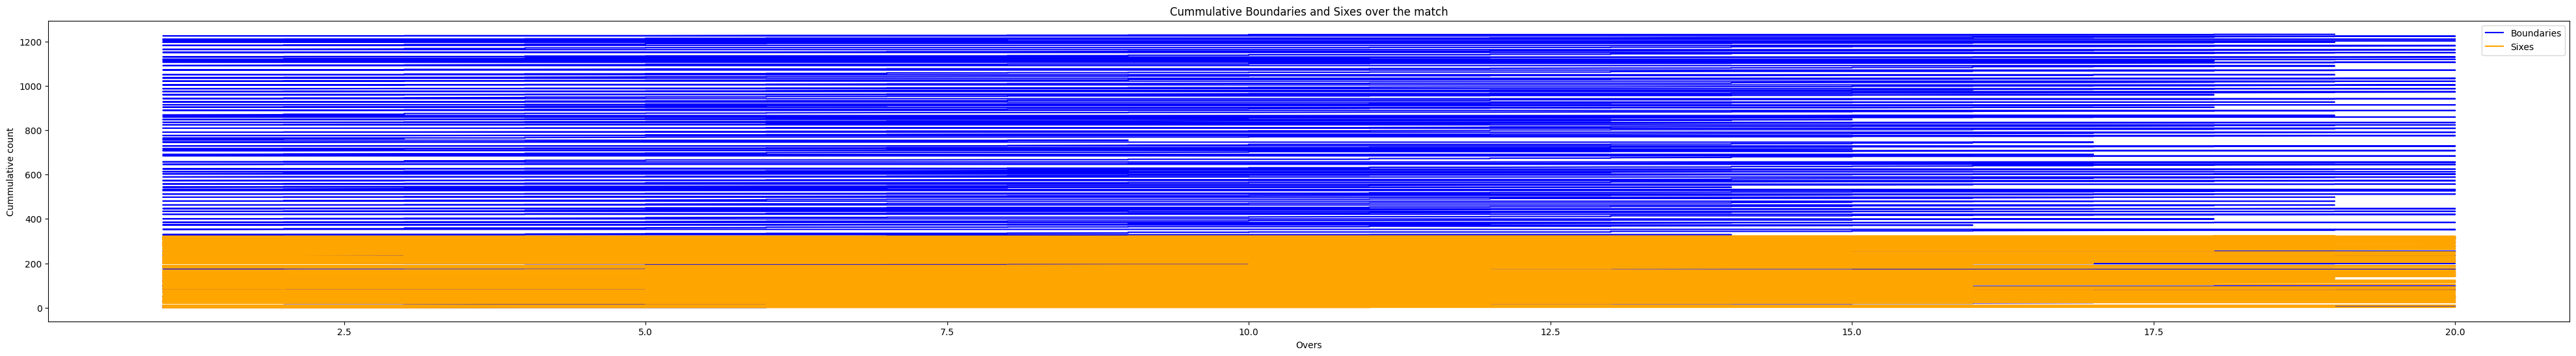

In [ ]:
#Boundaries and sixes
boundaries=data[data['isBoundary']]
six_events=data[data['runs']==6]
plt.figure(figsize=(50,6))
plt.plot(data['over'],data['isBoundary'].cumsum(),label='Boundaries',color='blue')
plt.plot(data['over'],data['runs'].apply(lambda x: 1 if x==6 else 0).cumsum(),label='Sixes',color='orange')
plt.title('Cummulative Boundaries and Sixes over the match')
plt.xlabel('Overs')
plt.ylabel('Cummulative count')
plt.legend()
plt.show()

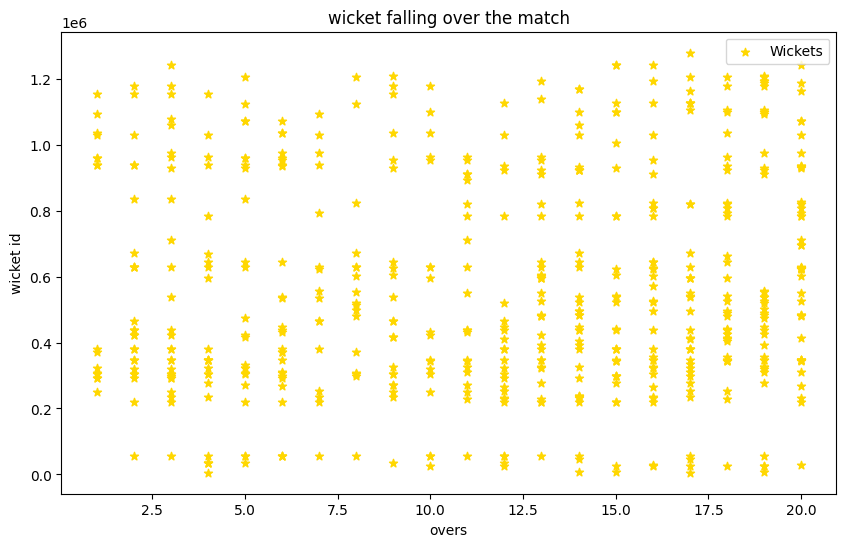

In [ ]:
#wickets
wicket_event=data[~data['wicket_id'].isnull()]
plt.figure(figsize=(10,6))
plt.scatter(wicket_event['over'],wicket_event['wicket_id'],marker='*',color='gold',label='Wickets')
plt.title('wicket falling over the match')
plt.xlabel('overs')
plt.ylabel('wicket id')
plt.legend()
plt.show()

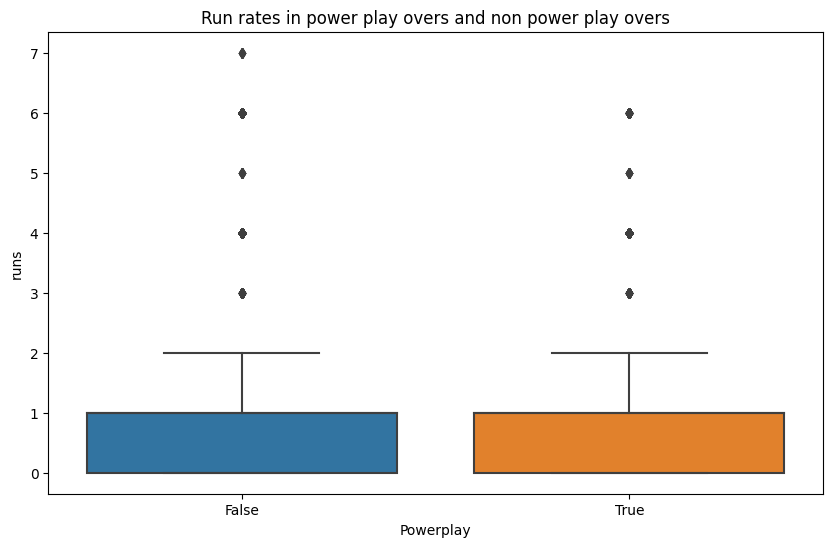

In [ ]:
#powerplay analysis
import seaborn as sns
powerplay=6
data['ispowerplay']=data['over']<=powerplay
plt.figure(figsize=(10,6))
sns.boxplot(x='ispowerplay',y='runs',data=data)
plt.title('Run rates in power play overs and non power play overs')
plt.xlabel('Powerplay')
plt.ylabel('runs')
plt.show()

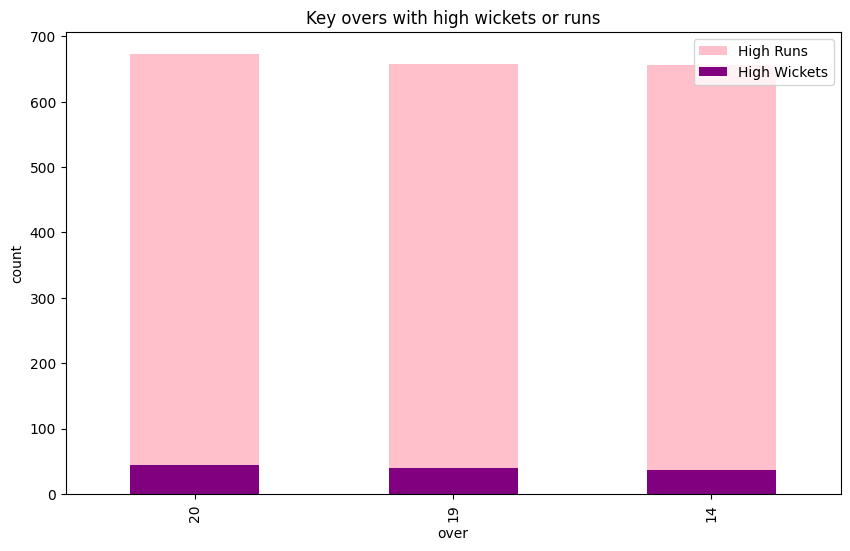

In [ ]:
#strategic moments like sudden change in run rate etc..
high_runs_overs=data.groupby('over')['runs'].sum().sort_values(ascending=False).head(3)
high_wickets_overs=data.groupby('over')['wicket_id'].count().sort_values(ascending=False).head(3)
plt.figure(figsize=(10,6))
high_runs_overs.plot(kind='bar',color='pink',label='High Runs')
high_wickets_overs.plot(kind='bar',color='purple',label='High Wickets')
plt.title('Key overs with high wickets or runs')
plt.xlabel('over')
plt.ylabel('count')
plt.legend()
plt.show()

2)IN-DEPTH ANALYSIS

In [ ]:
#player statistics
#centuries of the players
centuries_of_batsman=data[data['batsman1_runs']>=100]
print("centuries by batsman:")
print(centuries_of_batsman[['match_name','batsman1_name','batsman1_runs']])
centuries_by_batsman2=data[data['batsman2_runs']>=100]
print('\ncenturies by batsmen (batsman 2) :')
print(centuries_by_batsman2[['match_name','batsman2_name','batsman2_runs']])

centuries by batsman:
     match_name   batsman1_name  batsman1_runs
4360    NZ v SL  Glenn Phillips            102
4361    NZ v SL  Glenn Phillips            103
4362    NZ v SL  Glenn Phillips            104
4363    NZ v SL  Glenn Phillips            103
5088   BAN v SA   Rilee Rossouw            100
5090   BAN v SA   Rilee Rossouw            106
5092   BAN v SA   Rilee Rossouw            107
5098   BAN v SA   Rilee Rossouw            109
5099   BAN v SA   Rilee Rossouw            109

centuries by batsmen (batsman 2) :
     match_name   batsman2_name  batsman2_runs
4364    NZ v SL  Glenn Phillips            104
4365    NZ v SL  Glenn Phillips            104
5089   BAN v SA   Rilee Rossouw            100
5091   BAN v SA   Rilee Rossouw            106
5093   BAN v SA   Rilee Rossouw            107
5094   BAN v SA   Rilee Rossouw            107
5095   BAN v SA   Rilee Rossouw            107
5096   BAN v SA   Rilee Rossouw            107
5097   BAN v SA   Rilee Rossouw            107


In [ ]:
#five-wicket hauls of the bowlers
five_wickets=data[data['bowler1_wkts']>=5]
print("Five Wicket hauls by bowlers :")
print(five_wickets[['match_name','bowler1_name','bowler1_wkts']])
five_wkts_2=data[data['bowler2_wkts']>=5]
print("\nFive wickets hauls by bowlers(bowler 2) :")
print(five_wkts_2[['match_name','bowler2_name','bowler2_wkts']])

Five Wicket hauls by bowlers :
     match_name bowler1_name  bowler1_wkts
6570  AFG v ENG   Sam Curran             5

Five wickets hauls by bowlers(bowler 2) :
Empty DataFrame
Columns: [match_name, bowler2_name, bowler2_wkts]
Index: []


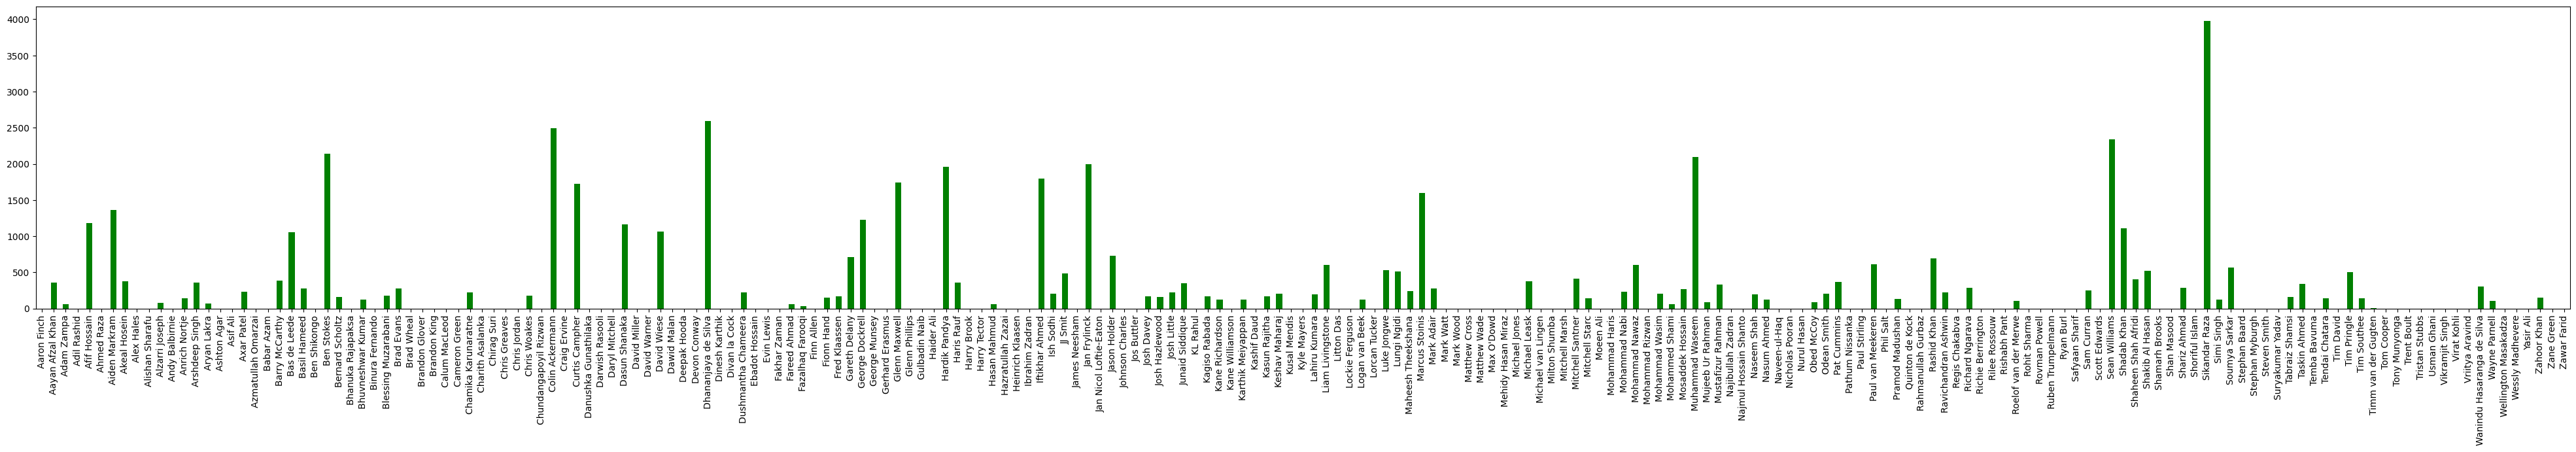

In [ ]:
#best performer of the tournament
tot_runs_by_player=data.groupby('batsman1_name')['batsman1_runs'].sum()
batting_average_by_player=tot_runs_by_player/data.groupby('batsman1_name')['match_id'].nunique()
strike_rate_by_player=((tot_runs_by_player)/data.groupby('batsman1_name')['batsman1_balls'].sum())*100
tot_wkts_by_player=data.groupby('bowler1_name')['bowler1_wkts'].sum()
bowling_strike_rate=(data.groupby('bowler1_name')['bowler1_runs'].sum()/tot_wkts_by_player)/data.groupby('bowler1_name')['bowler1_overs'].sum()
overall_score=tot_runs_by_player+strike_rate_by_player+tot_wkts_by_player+bowling_strike_rate
plt.figure(figsize=(50,6))
overall_score.plot(kind='bar',color='green')
plt.show()

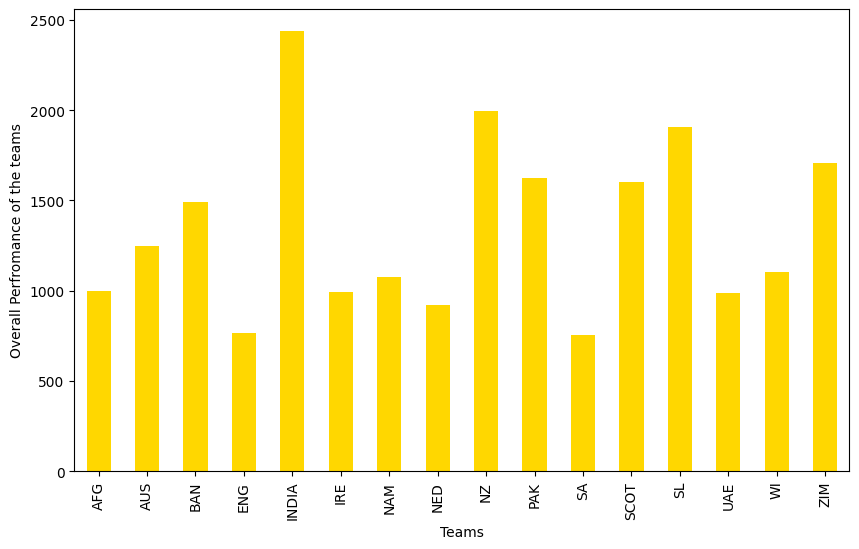

In [ ]:
#team performances
tot_runs_by_team=data.groupby('home_team')['runs'].sum()
tot_wkts_by_team=data.groupby('home_team')['bowler1_wkts'].sum()
avg_runs_per_match_team=tot_runs_by_team/data.groupby('home_team')['match_id'].nunique()
team_overall_scores=tot_runs_by_team+tot_wkts_by_team+avg_runs_per_match_team
plt.figure(figsize=(10,6))
team_overall_scores.plot(kind='bar',color='gold')
plt.xlabel('Teams')
plt.ylabel('Overall Perfromance of the teams')
plt.show()

In [ ]:
#correlation between performance metrics
selected_metrics=['batsman1_runs','batsman1_balls','bowler1_wkts','bowler1_runs']
sunset_data=data[['batsman1_runs','batsman1_balls','bowler1_wkts','bowler1_runs']]
corr_matrix=sunset_data.corr()
print("Correlation Matrix :")
print(corr_matrix)

Correlation Matrix :
                batsman1_runs  batsman1_balls  bowler1_wkts  bowler1_runs
batsman1_runs        1.000000        0.930558     -0.063837      0.371941
batsman1_balls       0.930558        1.000000     -0.074454      0.290863
bowler1_wkts        -0.063837       -0.074454      1.000000      0.242561
bowler1_runs         0.371941        0.290863      0.242561      1.000000


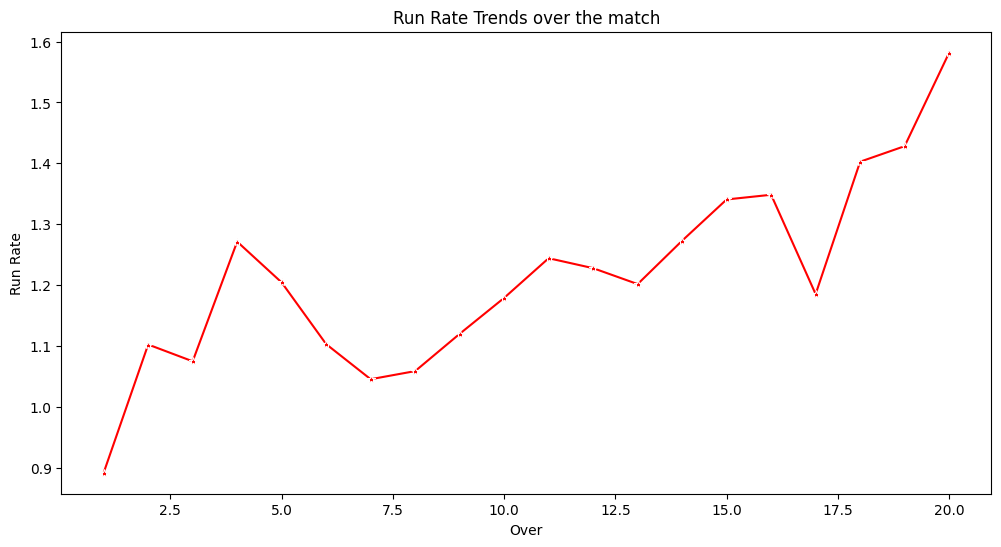

In [ ]:
#visualization of over by over run rate
import seaborn as sns
run_rate_by_over=data.groupby('over')['runs'].mean()
plt.figure(figsize=(12,6))
sns.lineplot(x=run_rate_by_over.index,y=run_rate_by_over.values,marker='*',color='red')
plt.title('Run Rate Trends over the match')
plt.xlabel('Over')
plt.ylabel('Run Rate')
plt.show()